# Project 2: Titanic Dataset Investigation
## By Wenny Wu

In [1]:
import csv as csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read Titanic data into a pandas dataframe
df = pd.read_csv('titanic_data.csv', header=0)

In [3]:
# preview the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# What factors gave passengers greater likelihood of survival?

## How many passengers survived?

In [18]:
# Check for null values
df[df['Survived'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [3]:
# total number survivors and non-survivors
n_surv = len(df[df["Survived"] == 1])
n_died = len(df[df["Survived"] == 0])

In [4]:
# proportion survivors and non-survivors
p_surv = float(n_surv)/float(len(df))
p_died = float(n_died)/float(len(df))

In [5]:
# Summary of survival rate of all passengers
df_surv = pd.DataFrame(
    data=[[len(df), n_surv, n_died, round(p_surv,2), round(p_died,2)],],
    index=['Passengers'],
    columns=['Passenger Total', 'Number Survived', 'Number Died', 'Proportion Survived', 'Proportion Died'])

df_surv

,Passenger Total,Number Survived,Number Died,Proportion Survived,Proportion Died
Passengers,891,342,549,0.38,0.62


## What percentage of men and women survived?

In [19]:
# Check for null values
df[df['Sex'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [6]:
# total number of female passengers and male passengers
n_women = len(df[df["Sex"] == "female"])
n_men = len(df[df["Sex"] == "male"])

n_s = df.groupby("Sex")["Survived"].sum()
s_women = n_s["female"]
s_men = n_s["male"]

In [7]:
# proportion survivors
prop_s = df.groupby("Sex")["Survived"].mean()
ps_women = round(prop_s["female"],2)
ps_men = round(prop_s["male"],2)

In [8]:
# Summary of survival of male and female passengers
df_fm = pd.DataFrame(
    data=[[n_women, s_women, n_women-s_women, ps_women, 1-ps_women],
        [n_men, s_men, n_men-s_men, ps_men, 1-ps_men],],
    index=['Female', 'Male'],
    columns=['Passenger Total', 'Number Survived', 'Number Died', 'Proportion Survived', 'Proportion Died'])

df_surv = df_surv.append(df_fm)
df_surv

,Passenger Total,Number Survived,Number Died,Proportion Survived,Proportion Died
Passengers,891,342,549,0.38,0.62
Female,314,233,81,0.74,0.26
Male,577,109,468,0.19,0.81


## What was the survival rate for each passenger class?

In [21]:
# Check for null values
df[df['Pclass'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
# total number of passengers first class, second class, and third class
n_c1 = len(df[df["Pclass"] == 1])
n_c2 = len(df[df["Pclass"] == 2])
n_c3 = len(df[df["Pclass"] == 3])

In [10]:
# number of survivors from first class, second class, and third class
n_class = df.groupby("Pclass").sum()
s_c1 = n_class["Survived"][1]
s_c2 = n_class["Survived"][2]
s_c3 = n_class["Survived"][3]

In [11]:
# proportion survivors
ps_class = df.groupby("Pclass").mean()
ps_c1 = round(ps_class["Survived"][1], 2)
ps_c2 = round(ps_class["Survived"][2], 2)
ps_c3 = round(ps_class["Survived"][3], 2)

In [12]:
# Summary of survival of first class, second class, and third class passengers
df_class = pd.DataFrame(
    data=[[n_c1, s_c1, n_c1-s_c1, ps_c1, 1-ps_c1],
          [n_c2, s_c2, n_c2-s_c2, ps_c2, 1-ps_c2],
          [n_c3, s_c3, n_c3-s_c3, ps_c3, 1-ps_c3],],
    index=['First Class', 'Second Class', 'Third Class'],
    columns=['Passenger Total', 'Number Survived', 'Number Died', 'Proportion Survived', 'Proportion Died'])

df_surv = df_surv.append(df_class)
df_surv

,Passenger Total,Number Survived,Number Died,Proportion Survived,Proportion Died
Passengers,891,342,549,0.38,0.62
Female,314,233,81,0.74,0.26
Male,577,109,468,0.19,0.81
First Class,216,136,80,0.63,0.37
Second Class,184,87,97,0.47,0.53
Third Class,491,119,372,0.24,0.76


In [79]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


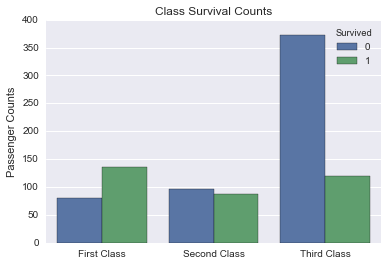

In [83]:
class_s = df.groupby(['Pclass', 'Survived']).apply(len).reset_index()
p = sns.barplot(data = class_s, x = 'Pclass', y = 0, hue = 'Survived')
p.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
p.set(xlabel = '', ylabel = 'Passenger Counts', title = 'Class Survival Counts')

## Insights regarding survival rates based on gender and passenger class:

### Female passengers were clearly more likely to survive. Passenger class also had a significant influence on survival rates, with first class passengers far more likely to survive over third class passengers.

## What do the age distributions look like?

In [77]:
# Check for null values
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN
29,male,3,NaN
31,female,1,NaN
32,female,3,NaN
36,male,3,NaN
42,male,3,NaN
45,male,3,NaN


In [78]:
# Data wrangling: drop rows where no age is recorded

# create new dataframes for survivors and non-survivors without null age values
survived = df[df["Survived"] == 1].dropna(subset=["Age"])
died = df[df["Survived"] == 0].dropna(subset=["Age"])

# create new dataframes for female and male passengers without null age values
women = df[df["Sex"] == "female"].dropna(subset=["Age"])
men = df[df["Sex"] == "male"].dropna(subset=["Age"])

# create new dataframes for female and male survivors without null age values
women_s = women[women["Survived"] == 1].dropna(subset=["Age"])
men_s = men[men["Survived"] == 1].dropna(subset=["Age"])

# create dataframes for first class, second class, and third class passengers without null age values
class1 = df[df["Pclass"] == 1].dropna(subset=["Age"])
class2 = df[df["Pclass"] == 2].dropna(subset=["Age"])
class3 = df[df["Pclass"] == 3].dropna(subset=["Age"])

# create dataframes for first class, second class, and third class survivors without null age values
s1 = class1[class1["Survived"] == 1].dropna(subset=["Age"])
s2 = class2[class2["Survived"] == 1].dropna(subset=["Age"])
s3 = class3[class3["Survived"] == 1].dropna(subset=["Age"])

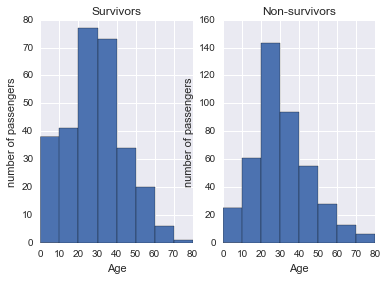

In [80]:
# age distribution of survivors and non-survivors
plt.subplot(121)
survived['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('Survivors')
plt.xlabel('Age')
plt.ylabel('number of passengers')

plt.subplot(122)
died['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('Non-survivors')
plt.xlabel('Age')
plt.ylabel('number of passengers')

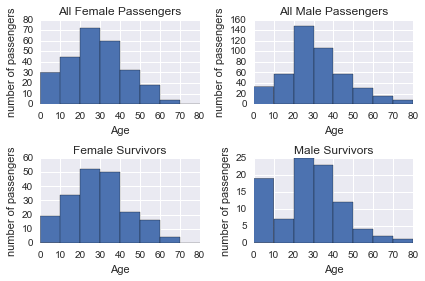

In [81]:
# age distribution of women and men
fig, axes = plt.subplots(nrows=2, ncols=2)

plt.subplot(221)
women['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('All Female Passengers')
plt.xlabel('Age')
plt.ylabel('number of passengers')

plt.subplot(222)
men['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('All Male Passengers')
plt.xlabel('Age')
plt.ylabel('number of passengers')

plt.subplot(223)
women_s['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('Female Survivors')
plt.xlabel('Age')
plt.ylabel('number of passengers')

plt.subplot(224)
men_s['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('Male Survivors')
plt.xlabel('Age')
plt.ylabel('number of passengers')

fig.tight_layout()

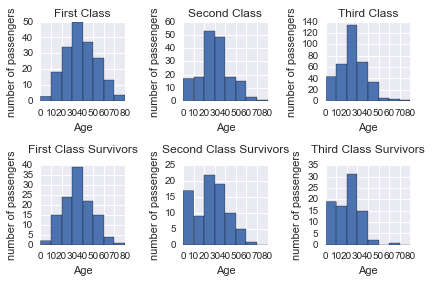

In [82]:
# age distribution of survivors by passenger class
fig, axes = plt.subplots(nrows=2, ncols=3)

plt.subplot(231)
class1['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('First Class')
plt.xlabel('Age')
plt.ylabel('number of passengers')

plt.subplot(232)
class2['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('Second Class')
plt.xlabel('Age')
plt.ylabel('number of passengers')

plt.subplot(233)
class3['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('Third Class')
plt.xlabel('Age')
plt.ylabel('number of passengers')

plt.subplot(234)
s1['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('First Class Survivors', y = 1.1)
plt.xlabel('Age')
plt.ylabel('number of passengers')

plt.subplot(235)
s2['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('Second Class Survivors', y = 1.1)
plt.xlabel('Age')
plt.ylabel('number of passengers')

plt.subplot(236)
s3['Age'].hist(bins=8, range=(0,80), alpha = 1)
plt.title('Third Class Survivors', y = 1.1)
plt.xlabel('Age')
plt.ylabel('number of passengers')

fig.tight_layout()

### The overall age distribution of survivors is skewed younger, indicating that infants and children were indeed more likely spared over older passengers.

### The age distribution of female survivors does not differ much from that of all female passengers, so age did not play a significant role in terms of survival for female passengers. However, the age distribution for male survivors is heavily skewed left, showing that male children ages of 0-10 were evacuated, but many older male passengers were left behind.

### The age distribution for first class passengers and first class survivors do not differ greatly. For second class passengers, however, children ages 0-10 were spared while older second class passengers were left behind. For third class passengers, the distribution of passengers is heavily skewed left, indicating that infants and young children were more likely to survive while older passengers perished.


## Conclusion:

### The data indicates that female and young children aboard the Titanic were far more likely to survive than adult men. Passenger class also had an effect on survival rate, with first class passengers more likely to survive than third class passengers. 

### This analysis was performed on a sample dataset of 891 passengers aboard the Titanic. Historically, 1502 out of 2224 passengers and crew perished on April 15, 1912 when the ship struck an iceberg in the Atlantic Ocean.

### Several limitations exist for working with this dataset:
### For example, the dataset only contained 891 of the 2224 passengers on board the Titanic. The remaining 1,333 passenger entries could lead to further insight that could change the conclusions we arrived at here. 
### Furthermore, the dataset is riddled with missing values. Null values were not an issue for survival status, gender, or passenger class, but they were an issue for age. In this instance, rows with missing age values were ommitted, but ommitting or interpolating missing values can also influence the resulting conclusion or alter the integrity of the data. 
### Lastly, the limitations of relying solely on statistical calculations without statistical testing mean we cannot quantify the statistical significance of the difference in survival rates between gender, passenger class, or age and do not have a confidence interval for how different those average survival rates are.

Resources:
https://www.kaggle.com/c/titanic/data
http://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
http://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny